In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt



In [4]:
# Assuming your CSV file is named 'Suicides.csv' and in the same directory
suicide_df = pd.read_csv('Suicides.csv')

# Data Cleaning and Preprocessing
statewise_df = suicide_df.drop(suicide_df[(suicide_df.State == 'Total (Uts)') | (suicide_df.State == 'Total (All India)') |
               (suicide_df.State == 'Total (States)')].index)
statewise_df = statewise_df.drop(statewise_df[statewise_df['Total'] == 0].index)

#Renaming the 'Type' which has almost same meaning
statewise_df.replace('Bankruptcy or Sudden change in Economic',
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
statewise_df.replace('By Other means (please specify)', 'By Other means', inplace=True)
statewise_df.replace('Not having Children(Barrenness/Impotency',
           'Not having Children (Barrenness/Impotency)', inplace=True)
statewise_df = statewise_df.set_index(pd.Index([i for i in range(0,101110)]))


In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


Total number of suicides in each year:  Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64


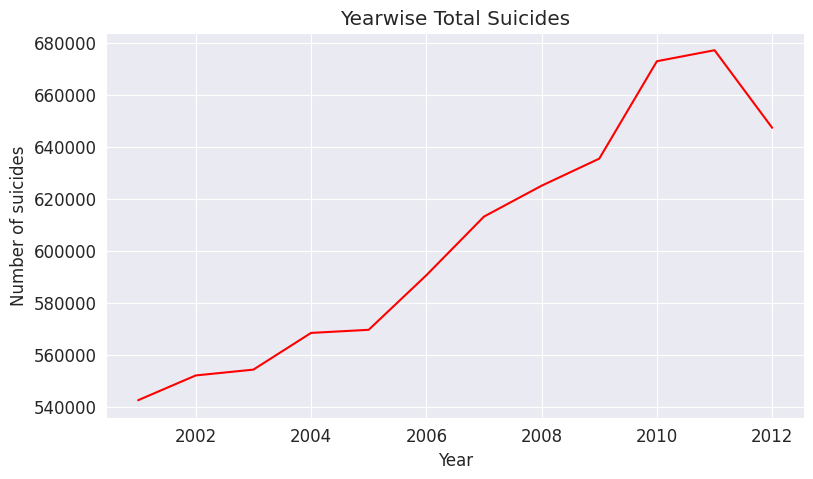

In [7]:
yearwise_total_suicide = statewise_df.groupby("Year")["Total"].sum()
print('Total number of suicides in each year: ', yearwise_total_suicide)

yearwise_total_suicide.plot(kind="line", figsize = (9,5), color = 'r')
plt.title('Yearwise Total Suicides')
plt.xlabel('Year')
plt.ylabel('Number of suicides')
plt.show() # Add plt.show() to display the plot in a script


Total number of suicides in each State :  State
A & N Islands          8109
Andhra Pradesh       814059
Arunachal Pradesh      6633
Assam                172276
Bihar                 46214
Chandigarh             5164
Chhattisgarh         302354
D & N Haveli           3430
Daman & Diu            1391
Delhi (Ut)            84272
Goa                   17363
Gujarat              330858
Haryana              147176
Himachal Pradesh      26562
Jammu & Kashmir       14821
Jharkhand             49720
Karnataka            734825
Kerala               538946
Lakshadweep              50
Madhya Pradesh       451535
Maharashtra          901945
Manipur                2102
Meghalaya              5415
Mizoram                4154
Nagaland               1728
Odisha               267234
Puducherry            32144
Punjab                46350
Rajasthan            255134
Sikkim                 9606
Tamil Nadu           818691
Tripura               45965
Uttar Pradesh        233352
Uttarakhand           18496


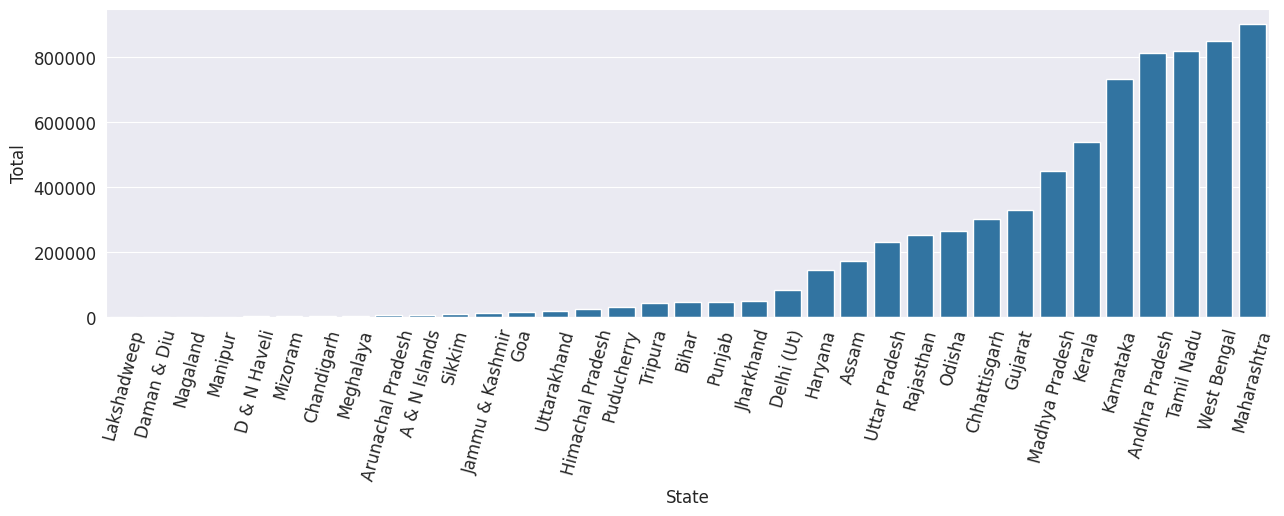

In [8]:
statewise_total_suicide = statewise_df.groupby("State")["Total"].sum()
print('Total number of suicides in each State : ', statewise_total_suicide)

filter_state = pd.DataFrame(statewise_total_suicide.reset_index())
sort_state = filter_state.sort_values('Total',ascending = True)

f, ax = plt.subplots(figsize=(15, 4))
sns.barplot(y = 'Total', x = 'State',data = sort_state)
plt.xticks(rotation=75)
plt.show()


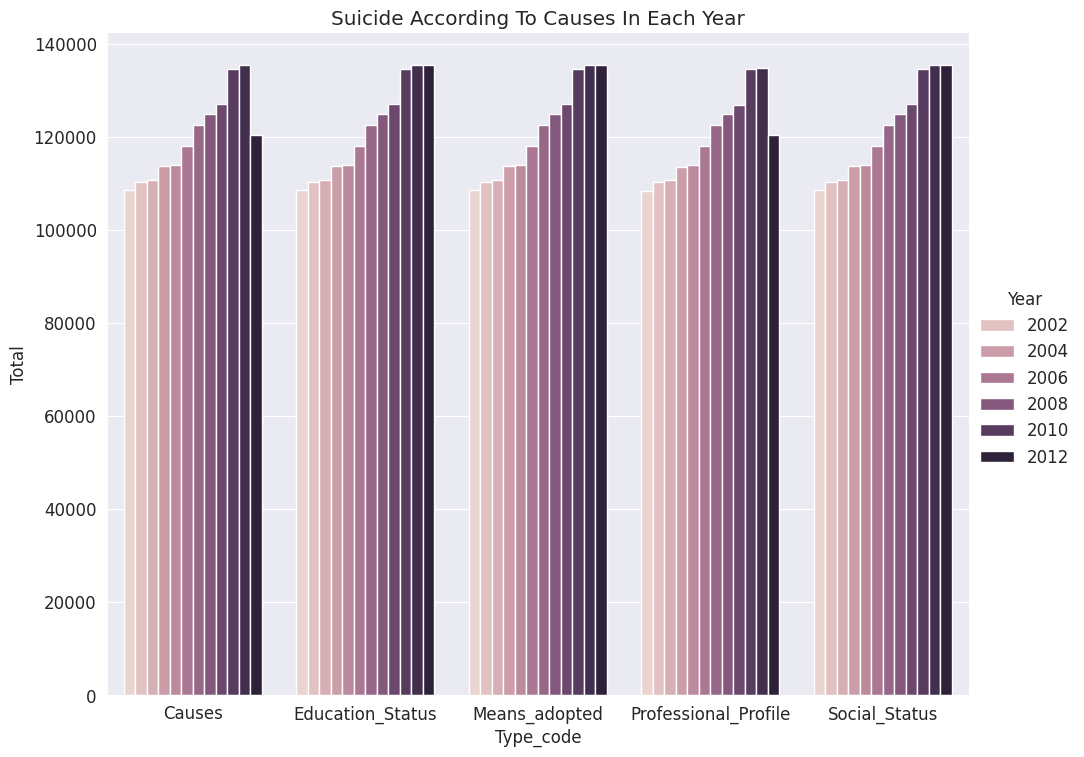

In [9]:
filter_type_code = pd.DataFrame(statewise_df.groupby(["Type_code","Year"])["Total"].sum()).reset_index()

sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=7.5, aspect=10/7.5)
plt.title('Suicide According To Causes In Each Year')
plt.show() # Add plt.show() to display the plot in a script


Gender
Male      54841
Female    46269
Name: count, dtype: int64


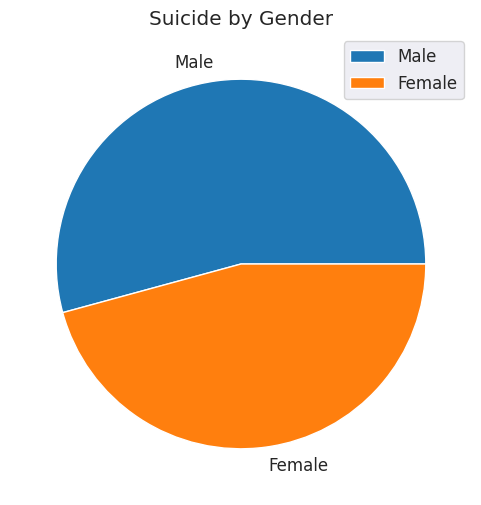

In [10]:
counts = statewise_df['Gender'].value_counts()
print(counts)

counts.plot(kind='pie', title='Suicide by Gender',figsize=(6,6))
plt.legend()
plt.ylabel('') # remove the y label to make it look cleaner
plt.show()


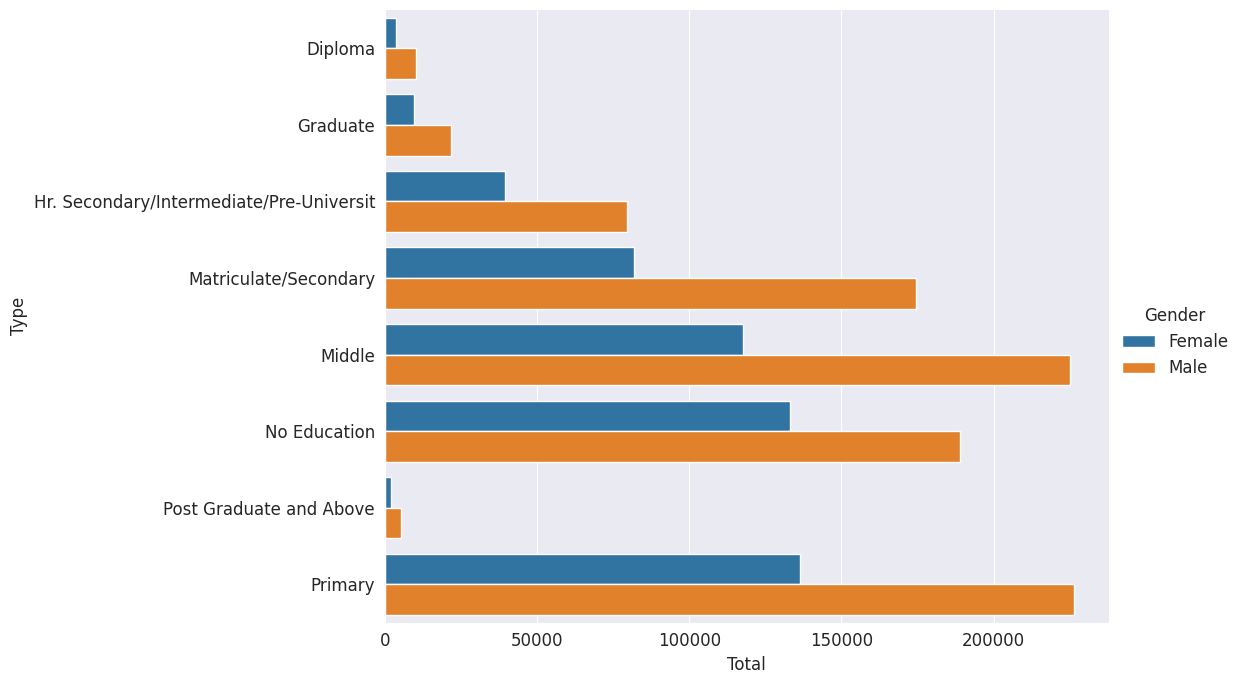

In [11]:
education_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Education_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()

g = sns.catplot(y="Type", x="Total",hue="Gender", kind="bar", data=education_status,height=7, aspect=11.7/7)
sns.set_style('whitegrid')
plt.show() # Add plt.show() to display the plot in a script


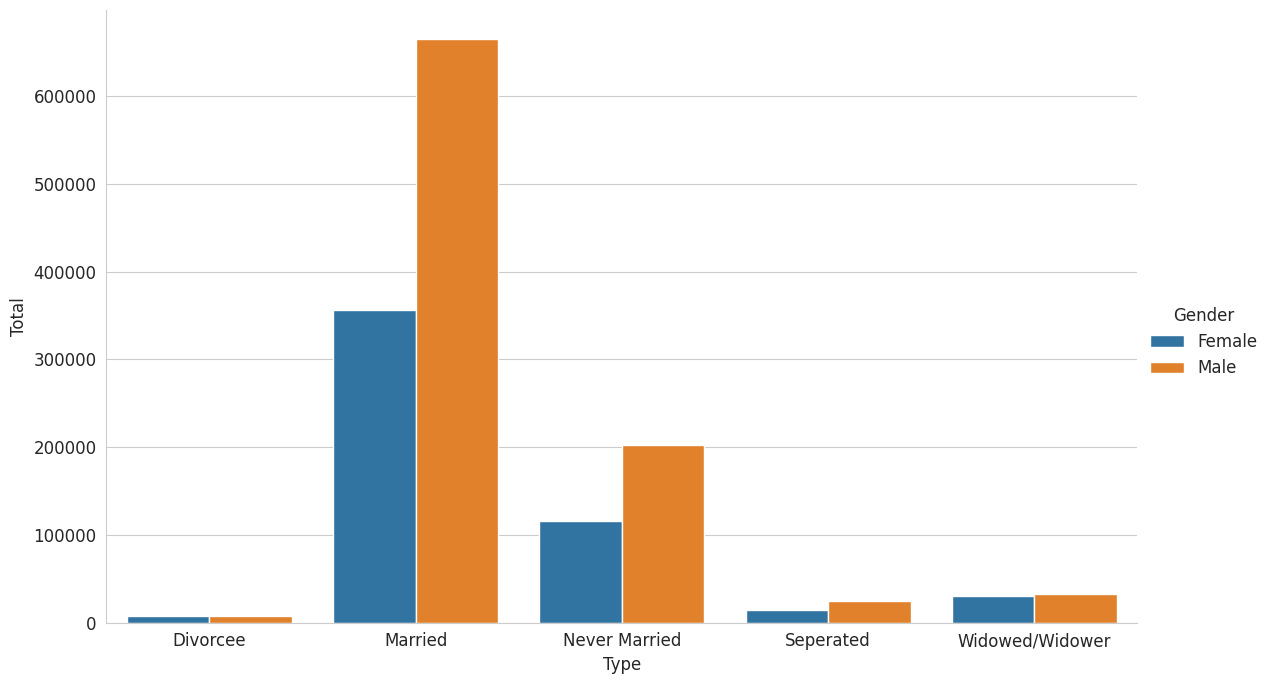

In [12]:
filter_social_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()

sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7, aspect=11.7/7)
plt.show() # Add plt.show() to display the plot in a script


Age_group
0-14      9639
15-29    24960
30-44    24064
45-59    19730
60+      13766
Name: count, dtype: int64


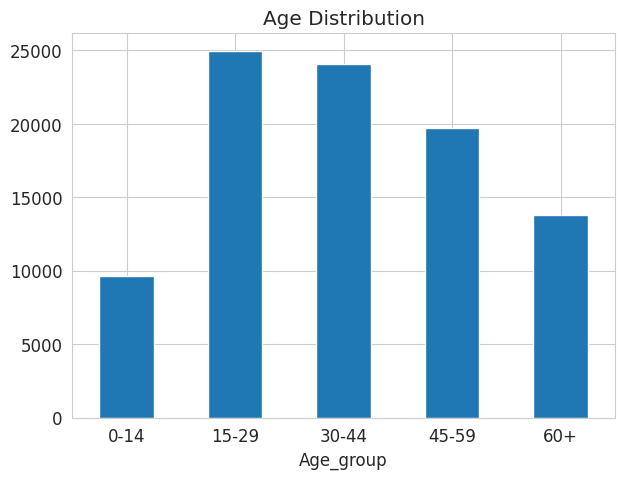

In [13]:
statewise_Age_df = statewise_df.drop(statewise_df[statewise_df.Age_group == '0-100+'].index)

counts = statewise_Age_df['Age_group'].value_counts().sort_index()
print(counts)

counts.plot(kind='bar', title='Age Distribution',figsize=(7,5))
plt.xticks(rotation=0)
plt.show()


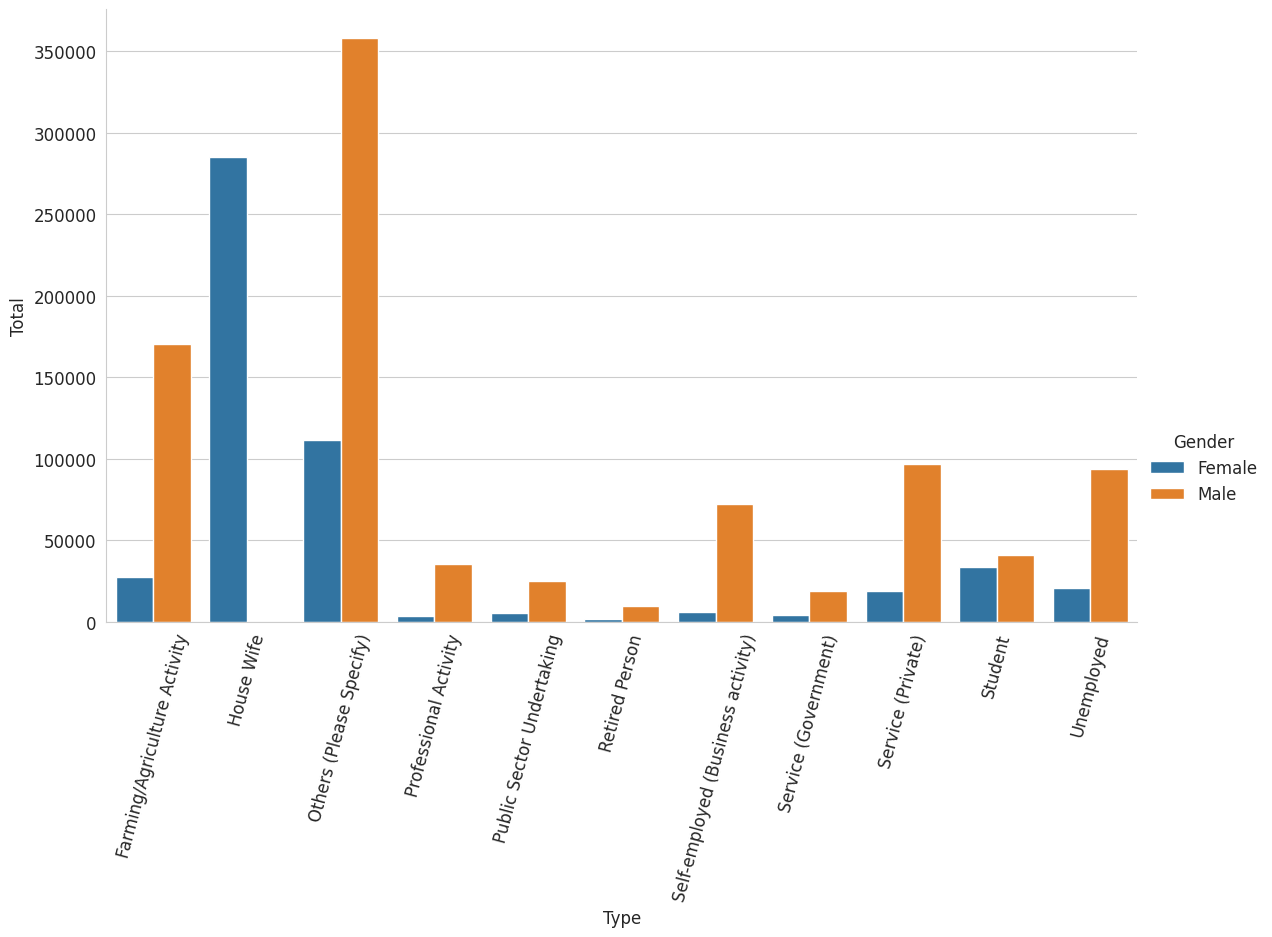

In [14]:
filter_social_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Professional_Profile"].groupby(["Type","Gender"])["Total"].sum()).reset_index()
g = sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7, aspect=11.7/7)
g.set_xticklabels(rotation=75)
plt.show() # Add plt.show() to display the plot in a script
